In [1]:
import cobra
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

In [2]:
cerevisiae = cobra.io.load_json_model('./COBRA models/iMM904.json')
cerevisiae

Name,iMM904
Memory address,0x0ceff73b240
Number of metabolites,1226
Number of reactions,1577
Objective expression,1.0*BIOMASS_SC5_notrace - 1.0*BIOMASS_SC5_notrace_reverse_93090
Compartments,"cytosol, mitochondria, extracellular space, peroxisome/glyoxysome, endoplasmic reticulum, vacuole, nucleus, golgi apparatus"


In [3]:
cerevisiaeMod1 = cobra.io.load_json_model('./COBRA models/butyrate production/cerevisiaeMod1.json')
cerevisiaeMod1a = cobra.io.load_json_model('./COBRA models/butyrate production/cerevisiaeMod1a.json')
cerevisiaeMod2 = cobra.io.load_json_model('./COBRA models/butyrate production/cerevisiaeMod2.json')
cerevisiaeMod3 = cobra.io.load_json_model('./COBRA models/butyrate production/cerevisiaeMod3.json')

In [4]:
cerevisiaeMod1.objective = cerevisiaeMod1.reactions.DM_but_c
cerevisiaeMod1a.objective = cerevisiaeMod1a.reactions.DM_but_c
cerevisiaeMod2.objective = cerevisiaeMod2.reactions.DM_but_c
cerevisiaeMod3.objective = cerevisiaeMod3.reactions.DM_but_c

In [5]:
cerevisiaeMod1.optimize()
cerevisiaeMod1.summary()

IN FLUXES     OUT FLUXES     OBJECTIVES
------------  -------------  --------------
glc__D_e  10  h_e     19.2   DM_but_c  7.48
o2_e       2  h2o_e   12.4
              co2_e    6.54
              succ_e   5.88


In [6]:
cerevisiaeMod1a.optimize()
cerevisiaeMod1a.summary()

IN FLUXES     OUT FLUXES     OBJECTIVES
------------  -------------  --------------
glc__D_e  10  h_e     14.2   DM_but_c  8.95
o2_e       2  h2o_e   12.3
              co2_e   11
              succ_e   2.63
              etoh_e   1.35


In [7]:
cerevisiaeMod2.optimize()
cerevisiaeMod2.summary()

IN FLUXES        OUT FLUXES    OBJECTIVES
---------------  ------------  --------------
glc__D_e  10     h2o_e  13.3   DM_but_c  11.7
o2_e       1.65  co2_e  13.3
                 h_e    11.7


In [8]:
cerevisiaeMod3.optimize()
cerevisiaeMod3.summary()

IN FLUXES     OUT FLUXES     OBJECTIVES
------------  -------------  --------------
glc__D_e  10  co2_e   14.1   DM_but_c  10.9
o2_e       2  h2o_e   12.9
              h_e     10.9
              etoh_e   1.14


## The optmal flux for butyrate production is using the prescribed reactions: 

In [9]:
cerevisiaeMod1a.metabolites.but_c.summary()

PRODUCING REACTIONS -- Butyrate (n-C4:0) (but_c)
------------------------------------------------
%       FLUX  RXN ID    REACTION
----  ------  --------  ---------------------------------------
100%    8.95  BCOAhydb  btcoa_c + h2o_c <=> but_c + coa_c + h_c

CONSUMING REACTIONS -- Butyrate (n-C4:0) (but_c)
------------------------------------------------
%       FLUX  RXN ID    REACTION
----  ------  --------  ---------------------------------------
100%    8.95  DM_but_c  but_c -->


In [10]:
cerevisiaeMod1a.metabolites.btcoa_c.summary()

PRODUCING REACTIONS -- Butanoyl-CoA (btcoa_c)
---------------------------------------------
%       FLUX  RXN ID    REACTION
----  ------  --------  ------------------------------------------
100%    8.95  ACOAD1b   b2coa_c + h_c + nadh_c <=> btcoa_c + nad_c

CONSUMING REACTIONS -- Butanoyl-CoA (btcoa_c)
---------------------------------------------
%       FLUX  RXN ID    REACTION
----  ------  --------  ------------------------------------------
100%    8.95  BCOAhydb  btcoa_c + h2o_c <=> but_c + coa_c + h_c


In [11]:
cerevisiaeMod1a.metabolites.b2coa_c.summary()

PRODUCING REACTIONS -- Crotonoyl-CoA (b2coa_c)
----------------------------------------------
%       FLUX  RXN ID     REACTION
----  ------  ---------  ------------------------------------------
100%    8.95  HBCOAhydb  3hbcoa_c <=> b2coa_c + h2o_c

CONSUMING REACTIONS -- Crotonoyl-CoA (b2coa_c)
----------------------------------------------
%       FLUX  RXN ID     REACTION
----  ------  ---------  ------------------------------------------
100%    8.95  ACOAD1b    b2coa_c + h_c + nadh_c <=> btcoa_c + nad_c


# Optimal Biomass Production: 

In [12]:
cerevisiaeMod1.objective = 'BIOMASS_SC5_notrace' 
cerevisiaeMod1a.objective = 'BIOMASS_SC5_notrace' 
cerevisiaeMod2.objective = 'BIOMASS_SC5_notrace' 
cerevisiaeMod3.objective = 'BIOMASS_SC5_notrace' 

In [13]:
cerevisiaeMod1.optimize()
cerevisiaeMod1.summary()

IN FLUXES          OUT FLUXES        OBJECTIVES
-----------------  ----------------  ----------------------
glc__D_e  10       co2_e   17.9      BIOMASS_SC5_...  0.291
o2_e       2       etoh_e  15.7
nh4_e      1.63    h2o_e    5.68
pi_e       0.0576  h_e      1.54
so4_e      0.0225  ac_e     0.0709
                   for_e    0.00151


In [14]:
cerevisiaeMod1a.optimize()
cerevisiaeMod1a.summary()

IN FLUXES          OUT FLUXES        OBJECTIVES
-----------------  ----------------  ----------------------
glc__D_e  10       co2_e   17.9      BIOMASS_SC5_...  0.291
o2_e       2       etoh_e  15.7
nh4_e      1.63    h2o_e    5.68
pi_e       0.0576  h_e      1.54
so4_e      0.0225  ac_e     0.0709
                   for_e    0.00151


In [15]:
cerevisiaeMod2.optimize()
cerevisiaeMod2.summary()

IN FLUXES          OUT FLUXES        OBJECTIVES
-----------------  ----------------  --------------------
glc__D_e  10       co2_e   17.2      BIOMASS_SC5_...  0.3
o2_e       2       etoh_e  13.9
nh4_e      1.68    h2o_e    6.85
pi_e       0.0594  h_e      2.56
so4_e      0.0232  for_e    0.00155


In [16]:
cerevisiaeMod3.optimize()
cerevisiaeMod3.summary()

IN FLUXES          OUT FLUXES        OBJECTIVES
-----------------  ----------------  ----------------------
glc__D_e  10       co2_e   17.6      BIOMASS_SC5_...  0.293
o2_e       2       etoh_e  14.9
nh4_e      1.64    h2o_e    6.16
pi_e       0.0579  h_e      2
so4_e      0.0227  ac_e     0.0713
                   for_e    0.00152


# Multi-objective optimization

https://cobrapy.readthedocs.io/en/latest/constraints_objectives.html

Here the scalarization of the multi-objective problem where the biomass and butyrate production are maximized is solved: 

$$
\begin{equation*}
\begin{aligned}
& \underset{f}{\text{maximize}}
& &  f_{biomass} +  \lambda \ f_{but} \\
& \text{subject to}
& & Sf = 0 \\
&&& l_i \leq f_i \leq u_i, \; i = 1, \ldots, m.
\end{aligned}
\end{equation*}
$$

In the objective $biomass$ and $but$ are functions of the vector of flows $f$. The parameter $\lambda$ controls the tradeoff between the biomass and the production of butyrate. 



In [17]:
biomass = cerevisiaeMod2.reactions.BIOMASS_SC5_notrace.flux_expression
but1 = cerevisiaeMod1.reactions.DM_but_c.flux_expression
but1a = cerevisiaeMod1a.reactions.DM_but_c.flux_expression
but2 = cerevisiaeMod2.reactions.DM_but_c.flux_expression
but3 = cerevisiaeMod3.reactions.DM_but_c.flux_expression

In [18]:
# solution path:
lams = np.arange(0, 0.07, 0.001)
nlams = len(lams)

buts1 = np.repeat(0.0, nlams)
buts1a = np.repeat(0.0, nlams)
buts2 = np.repeat(0.0, nlams)
buts3 = np.repeat(0.0, nlams)

biomasses1 = np.repeat(0.0, nlams)
biomasses1a = np.repeat(0.0, nlams)
biomasses2 = np.repeat(0.0, nlams)
biomasses3 = np.repeat(0.0, nlams)


for i, lam in enumerate(lams):
    
    biomass_but1 = cerevisiaeMod1.problem.Objective(biomass + lam*but1,
    direction='max')
    biomass_but1a = cerevisiaeMod1a.problem.Objective(biomass + lam*but1a,
    direction='max')
    biomass_but2 = cerevisiaeMod2.problem.Objective(biomass + lam*but2,
    direction='max')
    biomass_but3 = cerevisiaeMod3.problem.Objective(biomass + lam*but3,
    direction='max')
    
    cerevisiaeMod1.objective = biomass_but1
    cerevisiaeMod1a.objective = biomass_but1a
    cerevisiaeMod2.objective = biomass_but2
    cerevisiaeMod3.objective = biomass_but3
    
    solution1 = cerevisiaeMod1.optimize(objective_sense=None)
    solution1a = cerevisiaeMod1a.optimize(objective_sense=None)
    solution2 = cerevisiaeMod2.optimize(objective_sense=None)
    solution3 = cerevisiaeMod3.optimize(objective_sense=None)
    
    buts1[i] = solution1.fluxes.DM_but_c
    buts1a[i] = solution1a.fluxes.DM_but_c
    buts2[i] = solution2.fluxes.DM_but_c
    buts3[i] = solution3.fluxes.DM_but_c
    
    biomasses1[i] = solution1.fluxes.BIOMASS_SC5_notrace
    biomasses1a[i] = solution1a.fluxes.BIOMASS_SC5_notrace
    biomasses2[i] = solution2.fluxes.BIOMASS_SC5_notrace
    biomasses3[i] = solution3.fluxes.BIOMASS_SC5_notrace
    
    

## Some plots:

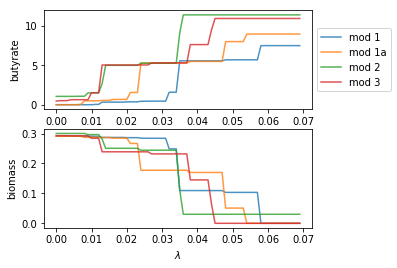

In [19]:
ax1 = plt.subplot(2, 1, 1)
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

a = 0.8
plt.plot(lams, buts1, label = 'mod 1', alpha = a)
plt.plot(lams, buts1a, label = 'mod 1a', alpha = a)
plt.plot(lams, buts2, label = 'mod 2', alpha = a)
plt.plot(lams, buts3, label = 'mod 3', alpha = a)
plt.ylabel('butyrate')

ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax2 = plt.subplot(2, 1, 2)
box2 = ax2.get_position()
ax2.set_position([box2.x0, box2.y0, box2.width * 0.8, box2.height])

plt.plot(lams, biomasses1, label = 'mod 1', alpha = a)
plt.plot(lams, biomasses1a, label = 'mod 1a', alpha = a)
plt.plot(lams, biomasses2, label = 'mod 2', alpha = a)
plt.plot(lams, biomasses3, label = 'mod 3', alpha = a)
plt.ylabel('biomass')
plt.xlabel('$\lambda$')

plt.savefig('lambdaBioBut.png', format='png', dpi=500)
plt.show()

### Model 2 is consistenly better:

The butyrate production is higher for any fixed biomass produciton. 

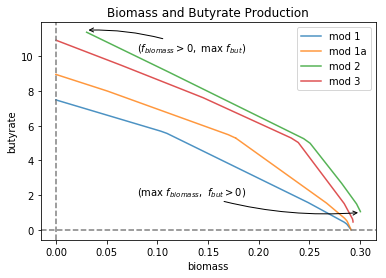

In [72]:
a = 0.8
plt.plot(biomasses1, buts1, label = 'mod 1', alpha = a)
plt.plot(biomasses1a, buts1a, label = 'mod 1a', alpha = a)
plt.plot(biomasses2, buts2, label = 'mod 2', alpha = a)
plt.plot(biomasses3, buts3, label = 'mod 3', alpha = a)
plt.axhline(y=0, color='gray', linestyle='--')
plt.axvline(x=0, color='gray', linestyle='--')


plt.annotate(
    '$( f_{biomass}  > 0 , \ \max \  f_{but})$',
    xy=(0.03, 11.5), arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=0.1"), 
    xytext=(0.08, 10.3))

plt.annotate(
    '$(\max \  f_{biomass}, \ f_{but}  > 0) $',
    xy=(0.3, 1), arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=0.1"), 
    xytext=(0.08, 2))


plt.title('Biomass and Butyrate Production')
plt.xlabel('biomass')
plt.ylabel('butyrate')
plt.legend()

plt.savefig('lambdaAllModels.png', format='png', dpi=500)
plt.show()

## Butyrate consumption for biomass in models 2 and 3

In [21]:
lam = 0.06

but2 = cerevisiaeMod2.reactions.DM_but_c.flux_expression
but3 = cerevisiaeMod3.reactions.DM_but_c.flux_expression

biomass_but2 = cerevisiaeMod2.problem.Objective(biomass + lam*but2,
    direction='max')
biomass_but3 = cerevisiaeMod3.problem.Objective(biomass + lam*but3,
    direction='max')

cerevisiaeMod2.objective = biomass_but2
cerevisiaeMod3.objective = biomass_but3

In [22]:
solution2 = cerevisiaeMod2.optimize(objective_sense=None)
solution3 = cerevisiaeMod3.optimize(objective_sense=None)

In [23]:
cerevisiaeMod2.metabolites.succ_c.summary()  

PRODUCING REACTIONS -- Succinate (succ_c)
-----------------------------------------
%    FLUX    RXN ID    REACTION
---  ------  --------  ----------


CONSUMING REACTIONS -- Succinate (succ_c)
-----------------------------------------
%    FLUX    RXN ID    REACTION
---  ------  --------  ----------



In [24]:
cerevisiaeMod2.summary()

IN FLUXES           OUT FLUXES    OBJECTIVES
------------------  ------------  -----------------------
glc__D_e  10        h2o_e  13.8   BIOMASS_SC5_...  0.0302
o2_e       2        co2_e  13.4   DM_but_c         0.683
nh4_e      0.169    h_e    11.5
pi_e       0.00597  but_c  11.4
so4_e      0.00233


In [25]:
cerevisiaeMod3.summary()

IN FLUXES     OUT FLUXES     OBJECTIVES
------------  -------------  ----------------------
glc__D_e  10  co2_e   14.1   BIOMASS_SC5_...  0
o2_e       2  h2o_e   12.9   DM_but_c         0.655
              but_c   10.9
              h_e     10.9
              etoh_e   1.14


In [26]:
cerevisiaeMod2.metabolites.but_c.summary()

PRODUCING REACTIONS -- Butyrate (n-C4:0) (but_c)
------------------------------------------------
%       FLUX  RXN ID      REACTION
----  ------  ----------  -------------------------------------------------
100%    11.4  FACOAL40ib  atp_c + but_c + coa_c <=> amp_c + btcoa_c + ppi_c

CONSUMING REACTIONS -- Butyrate (n-C4:0) (but_c)
------------------------------------------------
%       FLUX  RXN ID      REACTION
----  ------  ----------  -------------------------------------------------
100%    11.4  DM_but_c    but_c -->


In [27]:
cerevisiaeMod2.metabolites.btcoa_c.summary()

PRODUCING REACTIONS -- Butanoyl-CoA (btcoa_c)
---------------------------------------------
%       FLUX  RXN ID      REACTION
----  ------  ----------  -------------------------------------------------
100%    11.4  ACOAD1b     b2coa_c + h_c + nadh_c <=> btcoa_c + nad_c

CONSUMING REACTIONS -- Butanoyl-CoA (btcoa_c)
---------------------------------------------
%       FLUX  RXN ID      REACTION
----  ------  ----------  -------------------------------------------------
100%    11.4  FACOAL40ib  atp_c + but_c + coa_c <=> amp_c + btcoa_c + ppi_c


In [28]:
cerevisiaeMod2.metabolites.b2coa_c.summary()

PRODUCING REACTIONS -- Crotonoyl-CoA (b2coa_c)
----------------------------------------------
%       FLUX  RXN ID     REACTION
----  ------  ---------  ------------------------------------------
100%    11.4  HBCOAhydb  3hbcoa_c <=> b2coa_c + h2o_c

CONSUMING REACTIONS -- Crotonoyl-CoA (b2coa_c)
----------------------------------------------
%       FLUX  RXN ID     REACTION
----  ------  ---------  ------------------------------------------
100%    11.4  ACOAD1b    b2coa_c + h_c + nadh_c <=> btcoa_c + nad_c


In [29]:
cerevisiaeMod2.metabolites.get_by_id('3hbcoa_c').summary()

PRODUCING REACTIONS -- (R)-3-Hydroxybutyryl-CoA (3hbcoa_c)
----------------------------------------------------------
%       FLUX  RXN ID     REACTION
----  ------  ---------  -------------------------------------------
100%    11.4  AvAARb     aacoa_c + h_c + nadh_c <=> 3hbcoa_c + nad_c

CONSUMING REACTIONS -- (R)-3-Hydroxybutyryl-CoA (3hbcoa_c)
----------------------------------------------------------
%       FLUX  RXN ID     REACTION
----  ------  ---------  -------------------------------------------
100%    11.4  HBCOAhydb  3hbcoa_c <=> b2coa_c + h2o_c


In [30]:
cerevisiaeMod2.metabolites.aacoa_c.summary()

PRODUCING REACTIONS -- Acetoacetyl-CoA (aacoa_c)
------------------------------------------------
%       FLUX  RXN ID    REACTION
----  ------  --------  --------------------------------------------------
66%     7.54  ACACT1b   2.0 accoa_c <=> aacoa_c + coa_c
34%     3.84  HMGCOAS   coa_c + h_c + hmgcoa_c <=> aacoa_c + accoa_c + ...

CONSUMING REACTIONS -- Acetoacetyl-CoA (aacoa_c)
------------------------------------------------
%       FLUX  RXN ID    REACTION
----  ------  --------  --------------------------------------------------
100%   11.4   AvAARb    aacoa_c + h_c + nadh_c <=> 3hbcoa_c + nad_c


In [31]:
cerevisiaeMod2.metabolites.accoa_c.summary()

PRODUCING REACTIONS -- Acetyl-CoA (accoa_c)
-------------------------------------------
%       FLUX  RXN ID    REACTION
----  ------  --------  --------------------------------------------------
75%   11.3    ACS       ac_c + atp_c + coa_c --> accoa_c + amp_c + ppi_c
25%    3.84   HMGCOAS   coa_c + h_c + hmgcoa_c <=> aacoa_c + accoa_c + ...

CONSUMING REACTIONS -- Acetyl-CoA (accoa_c)
-------------------------------------------
%       FLUX  RXN ID    REACTION
----  ------  --------  --------------------------------------------------
100%  15.1    ACACT1b   2.0 accoa_c <=> aacoa_c + coa_c
0%     0.012  ACCOAC    accoa_c + atp_c + hco3_c <=> adp_c + h_c + malc...


In [32]:
cerevisiaeMod2.metabolites.glc__D_e.summary()

PRODUCING REACTIONS -- D-Glucose (glc__D_e)
-------------------------------------------
%       FLUX  RXN ID      REACTION
----  ------  ----------  ---------------------
100%      10  EX_glc_...  glc__D_e <=>

CONSUMING REACTIONS -- D-Glucose (glc__D_e)
-------------------------------------------
%       FLUX  RXN ID      REACTION
----  ------  ----------  ---------------------
100%      10  GLCt1       glc__D_e --> glc__D_c


In [33]:
cerevisiaeMod2.reactions.EX_o2_e

Reaction identifier,EX_o2_e
Name,O2 exchange
Memory address,0x0a9356b24a8
Stoichiometry,o2_e <=> O2 O2 <=>
GPR,
Lower bound,-2.0
Upper bound,999999.0


## Drawing the model escher: 

https://cnls.lanl.gov/external/qbio2018/Slides/FBA%202/qBio-FBA-lab-slides.pdf

In [36]:
Mod1 = cobra.io.load_json_model('./COBRA models/butyrate production/cerevisiaeMod1.json')
Mod1a = cobra.io.load_json_model('./COBRA models/butyrate production/cerevisiaeMod1a.json')
Mod2 = cobra.io.load_json_model('./COBRA models/butyrate production/cerevisiaeMod2.json')
Mod3 = cobra.io.load_json_model('./COBRA models/butyrate production/cerevisiaeMod3.json')

In [42]:
def escherDF(model, lam, name):
    
    modelCopy = model.copy()
    
    biomass = modelCopy.reactions.BIOMASS_SC5_notrace.flux_expression
    but = modelCopy.reactions.DM_but_c.flux_expression
    
    biomass_but = modelCopy.problem.Objective(biomass + lam*but, direction='max')
    modelCopy.objective = biomass_but
    
    solution = modelCopy.optimize(objective_sense=None)
    
    df = pd.DataFrame.from_dict([solution.x_dict]).T
    df.to_csv( name + '.csv')
    


In [44]:
escherDF(Mod1, 0.02, 'mod1_0.02')